<a href="datacamp.com/workspacecompetition" target="_blank">![banner](banner.png)</a>

# Loan Data

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#to create Pmf and Cdf
!pip install empiricaldist 
from empiricaldist import Pmf
from empiricaldist import Cdf

#To use linear regression between variables
from scipy.stats import linregress

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10733 sha256=084d112d6a26e99bba488ef7f3039a46fed3c4ec28e3585db50292c49c7fea3f
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


## Load your data

In [2]:
#For Kaggle usage only
import os
#Print out the file paths
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-data-analysis-datacamp-workspace/loan_data.csv
/kaggle/input/loan-data-analysis-datacamp-workspace/variable_explanation.csv


In [3]:
#Loading file from Kaggle
df = pd.read_csv('/kaggle/input/loan-data-analysis-datacamp-workspace/loan_data.csv', index_col=None)

# Load data from the csv file
# df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understand your variables

In [4]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
#Loading file from Kaggle
var_dict = pd.read_csv('/kaggle/input/loan-data-analysis-datacamp-workspace/variable_explanation.csv', index_col=0) 

# Join with the variables dataframe
# var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

In [5]:
#See the full descriptions of each of the variable
#Iterator for var_dict's values to be used in printing
var_description = (item for item in var_dict.values)
for i in range(len(variables['Variable'])):
    print(variables['Variable'][i],':', next(var_description))

credit_policy : ['1 if the customer meets the credit underwriting criteria; 0 otherwise.']
purpose : ['The purpose of the loan.']
int_rate : ['The interest rate of the loan (more risky borrowers are assigned higher interest rates).']
installment : ['The monthly installments owed by the borrower if the loan is funded.']
log_annual_inc : ['The natural log of the self-reported annual income of the borrower.']
dti : ['The debt-to-income ratio of the borrower (amount of debt divided by annual income).']
fico : ['The FICO credit score of the borrower.']
days_with_cr_line : ['The number of days the borrower has had a credit line.']
revol_bal : ["The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)."]
revol_util : ["The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)."]
inq_last_6mths : ["The borrower's number of inquiries by creditors in the last 6 months."]
delinq_2yrs : ['The number of

### Judging Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |

# **Exploratory Data Analysis**

We'll begin with some basic descriptive statistics below to understand more about each variable

In [6]:
#See the important stats of each variable in the dataset
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
#Check the variable types and whether there're any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


As we can see, there's no missing data in the dataset above, which will make the job of filling missing
values easier. 

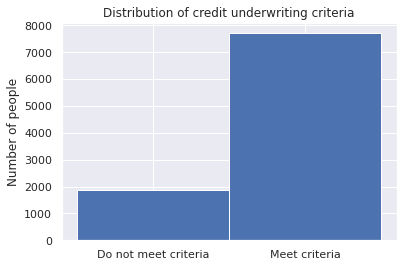

In [8]:
sns.set()  #Set to the default style of seaborn
#See the distribution of people who qualify for credit underwriting criteria
fig , ax = plt.subplots()
plt.hist(x = df['credit_policy'], bins = 2)
plt.title("Distribution of credit underwriting criteria")
plt.ylabel('Number of people')
ax.set_xticks((0.25, 0.75))
ax.set_xticklabels(['Do not meet criteria','Meet criteria'])
plt.show()

We can see that **there're almost 4 times the number of people** who meet underwriting criteria compared to those who don't.

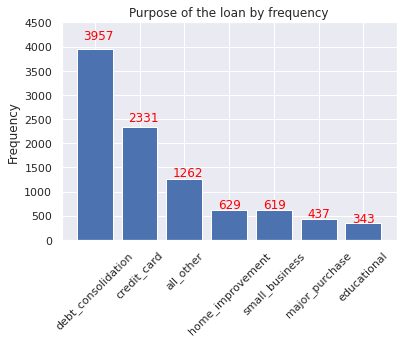

In [9]:
fig,ax = plt.subplots()
plt.bar(x = df['purpose'].unique(), height = df['purpose'].value_counts()) #default will sort from highest
plt.title("Purpose of the loan by frequency")
plt.ylabel('Frequency')
ax.set_ylim(0, 4500)
# Add the values on top of the x axis
values = df['purpose'].value_counts()
for hor, ver in enumerate(values):
    #hor is horizontal coordinate, ver is vertical coordinate
    ax.text(hor - 0.25, ver+ver*0.05, s = str(ver), color = 'red')
plt.xticks(x = df['purpose'].unique(), rotation=45) #Rotate X ticks by 45 degrees
plt.yticks()
plt.show()

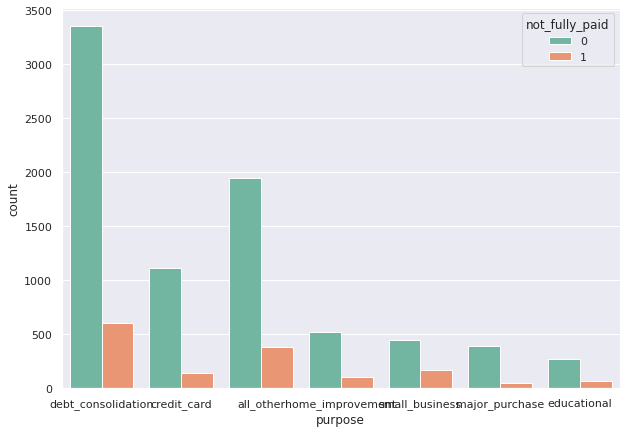

In [10]:
#We'll visualize this with seaborn to see which category has the most number of people who have not paid back their loan
plt.figure(figsize = (10, 7))
sns.countplot(x = 'purpose', hue ='not_fully_paid', data=df, palette = 'Set2')
plt.show()

Debt consolidation category has the highest number of unpaid loans, at over 500 people. 

Next we'll see the percentage of people who are most likely to not pay back based on their FICO score. We'll use the image below as guideline to divide into different categories.
1. 300 - 560: very bad
2. 560 - 650: bad
3. 650 - 700: fair
4. 700 - 750: good
5. 750 - 850: excellent 
![](https://d187qskirji7ti.cloudfront.net/news/wp-content/uploads/2014/04/Credit-Score-Factors.jpg)

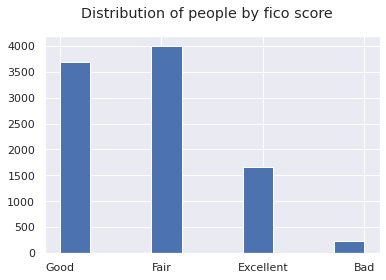

Fair         3990
Good         3687
Excellent    1670
Bad           231
Very bad        0
Name: fico, dtype: int64


In [11]:
plt.suptitle('Distribution of people by fico score')
pd.cut(df['fico'], bins = [300,560,650,700,750,850],
        labels =['Very bad','Bad','Fair','Good','Excellent']).hist()
plt.show()
df_fico = pd.cut(df['fico'], bins = [300,560,650,700,750,850],
        labels =['Very bad','Bad','Fair','Good','Excellent'])
print(df_fico.value_counts())

We can see that there're no people with "very bad" credit scores. There're over 5200 people, or more than 50% of dataset with scores of good or excellent. 

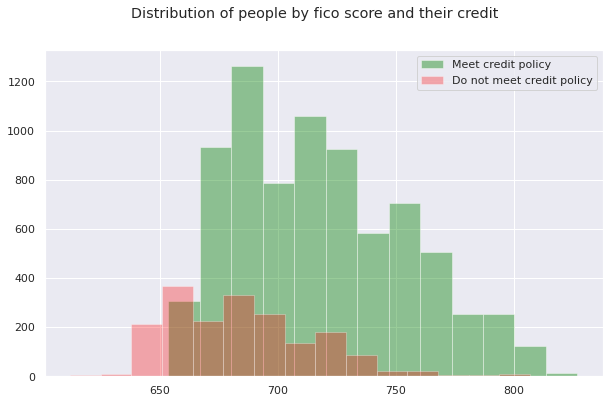

Number of people with good (700) or above credit score but do not meet credit policy is: 549


In [12]:
#Alternative way to visualize this with credit policy variable
plt.figure(figsize = (10,6))
plt.suptitle('Distribution of people by fico score and their credit')
df[df['credit_policy'] == 1]['fico'].hist(bins = 15,alpha = 0.4, color = 'green',
                                          label ='Meet credit policy')
df[df['credit_policy'] == 0]['fico'].hist(bins = 15,alpha = 0.3, color = 'red',
                                          label ='Do not meet credit policy')
plt.legend()
plt.show()
print("Number of people with good (700) or above credit score but do not meet credit policy is: " + 
      str(df[(df['credit_policy']==0) & (df['fico']>=700)]['credit_policy'].count()))

According to graph above, it's surprising to see that there's quite some number of people who do not meet underwriting credit criteria, but have "good" or even "excellent" scores. Next we'll look at the relationship between these variables: interest rate, credit policy, not_fully_paid, and fico score.

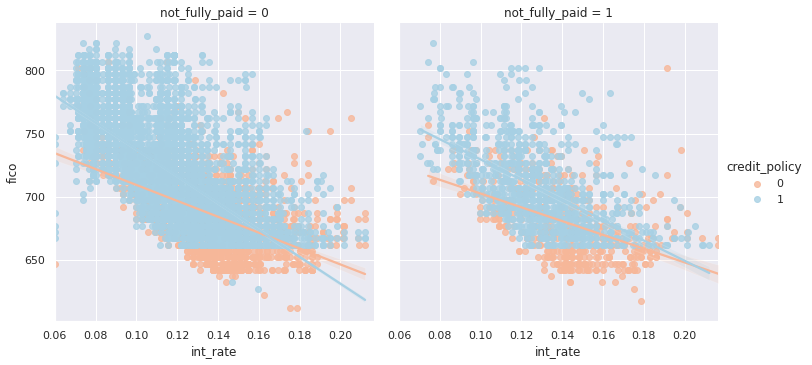

In [13]:
sns.lmplot(x = 'int_rate', y = 'fico', hue = 'credit_policy', col ='not_fully_paid', data=df, palette = 'RdBu')
plt.show()

People who meet credit policy tend to have lower interest rate and have higher fico score. In both plots, int_rate and fico score have negative linear relationship as indicated by the lines. 

LinregressResult(slope=-20.825127728201096, intercept=714.5047151170082, rvalue=-0.1392222227576963, pvalue=4.1498864099328595e-36, stderr=1.65165685201014, intercept_stderr=0.4322476079799651)
LinregressResult(slope=-18.564866369710458, intercept=699.5238625517022, rvalue=-0.16095043912966228, pvalue=2.3276223660800518e-10, stderr=2.9094621621382752, intercept_stderr=0.8917084500453969)


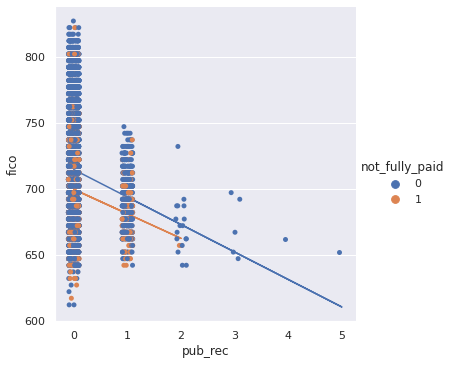

In [14]:
df_nfp_0 = df[df['not_fully_paid'] == 0]
df_nfp_1 = df[df['not_fully_paid'] == 1]
pub_rec_fico0 = linregress(df_nfp_0['pub_rec'], df_nfp_0['fico'])
pub_rec_fico1 = linregress(df_nfp_1['pub_rec'], df_nfp_1['fico'])
print(pub_rec_fico0)
print(pub_rec_fico1)
fx_pub_rec_0 = df_nfp_0['pub_rec']
fx_pub_rec_1 = df_nfp_1['pub_rec']
fy_fico_0 = pub_rec_fico0.intercept + fx_pub_rec_0 * pub_rec_fico0.slope
fy_fico_1 = pub_rec_fico1.intercept + fx_pub_rec_1 * pub_rec_fico1.slope
sns.catplot(x = 'pub_rec', y = 'fico', hue = 'not_fully_paid', data=df)
plt.plot(fx_pub_rec_0, fy_fico_0, '-')
plt.plot(fx_pub_rec_1, fy_fico_1, '-')
plt.show()

There's a strong correlation between having 0 public record and having fully paid. Also, if people have a public record or more, then it's very likely that their FICO score will be below 750. We also see that for every public record the person has, he/she will get -20 or -18 points deducted from their FICO score, depending on whether they have paid their loan in full. People who have not paid yet only have bad public records up to 2 times. 

In [15]:
df.groupby(['pub_rec'])['not_fully_paid'].describe()

,count,mean,std,min,25%,50%,75%,max
pub_rec,,,,,,,,
0,9019.0,0.154673,0.361613,0.0,0.0,0.0,0.0,1.0
1,533.0,0.255159,0.436360,0.0,0.0,0.0,1.0,1.0
2,19.0,0.105263,0.315302,0.0,0.0,0.0,0.0,1.0
3,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
5,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


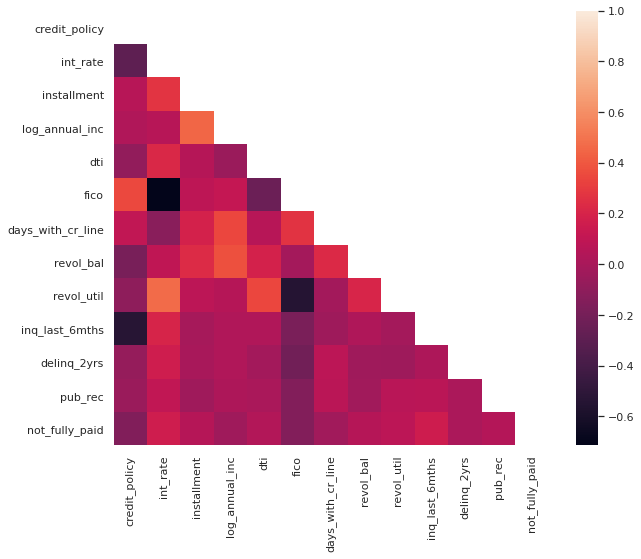

In [16]:
# Create correlation matrix and graph it
corr = df.corr()
#To cover half away the correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize = (10,8))
    ax = sns.heatmap(corr, mask = mask, vmax = 1, square = True)
plt.show()

From the correlation matrix, we can infer a few things: 
- There's a strong negative correlation between fico score and interest rate, that is they move in opposite direction. This makes sense because if someone has poor credit score, their interest will be higher and vice versa. We'll graph this below.
- There's a strong negative correlation between number of inquiry in the past 6 months and credit policy. As people make more credit inquiries, they'll be less likely to meet underwriting credit criteria. 
- Strong negative correlation between revolving utility (the amount of credit used over the total credit line available) and fico. For people who overspends their credit limit, this will have negative impact on their fico score. 
- Moderate positive correlation between natural log of annual income & installment. As people earn more money annually, they will also have a bigger monthly payment (installment) since they have more disposable income to spend. 
- Interest rate & revolving utility has moderate positive correlation. As people utilizes more of their available credit line, the interest rate for them will go up.
- Dti (debt-to-income ratio) and revolving utility has mild positive correlation. As people own more debt, it also means that they're utilizing more of their own available credit line. 
- Log annual income has mild positive correlation with days with credit line (how long they have had a credit line). 

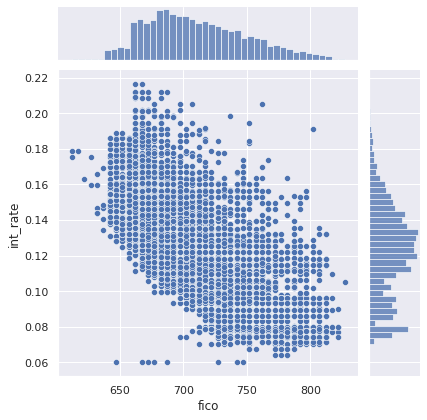

In [17]:
sns.jointplot(x ='fico', y = 'int_rate', data =df)
plt.show()

From the graph on top, we can see that interest rate will drop as fico score gets better.

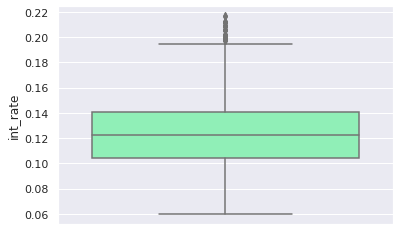

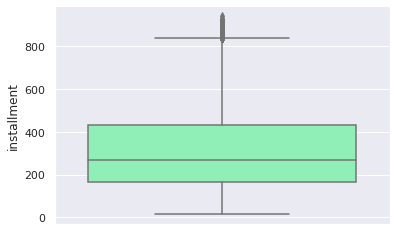

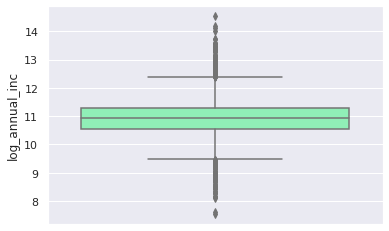

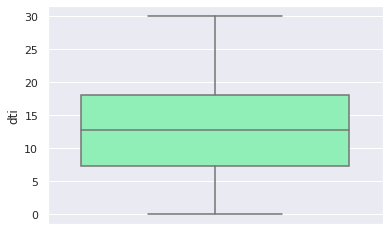

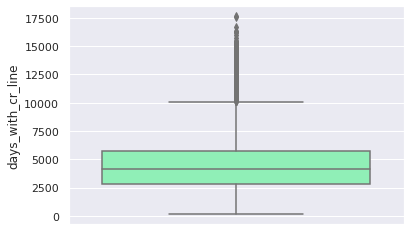

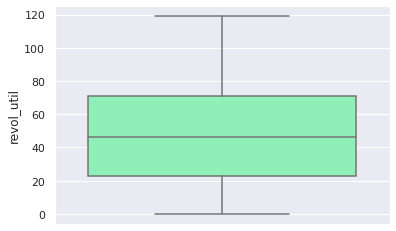

In [18]:
#Select continous variables (float)
cont_var = [c for c in df.columns if df[c].dtype == 'float']

#Graph continuous variables to see the distribution
for i in cont_var:
    sns.boxplot(y = i, palette = 'rainbow', data = df)
    plt.show()

Next we'll answer the question of when the loan will be paid off assuming that a monthly installment is being made. We'll create a new column for this. Then we'll use pivot table to see what types of loans will take the longest to pay off. 

In [19]:
df['time_to_paid_off_mths'] = df['revol_bal']/df['installment']
pd.pivot_table(index = 'purpose', values = 'time_to_paid_off_mths', aggfunc = 'mean', margins = True, 
               margins_name = 'Average across all purposes', data = df)

,time_to_paid_off_mths
purpose,
all_other,72.470874
credit_card,90.090695
debt_consolidation,56.338013
educational,71.684185
home_improvement,95.372521
major_purchase,42.882616
small_business,68.357813
Average across all purposes,67.987446


Home improvement seems to take the longest to pay off, at 95 months on average. The category "major_purchase" has the shortest paid off time at 42 months.

In [20]:
pd.pivot_table(index = 'purpose', values = ['log_annual_inc', 'dti', 'delinq_2yrs'], 
               aggfunc = {'log_annual_inc':np.mean,'dti':np.mean,
                           'delinq_2yrs': 'count'             }, data = df)

,delinq_2yrs,dti,log_annual_inc
purpose,,,
all_other,2331,11.079498,10.845313
credit_card,1262,14.099398,11.047230
debt_consolidation,3957,14.076462,10.912909
educational,343,11.344927,10.549956
home_improvement,629,10.197504,11.201979
major_purchase,437,10.159886,10.844895
small_business,619,10.793296,11.146216


There's not much income variation across different purposes, but we can see that groups with the most number of delinquencies in the past 2 years are "debt consolidation" and "all other". Debt-to-income ratio is also high in the debt consolidation and credit card groups.

Since income is a log variable, we'll use a special KDE plot to see its distribution.

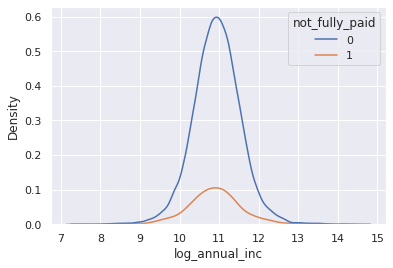

In [21]:
sns.kdeplot(df['log_annual_inc'], hue = df['not_fully_paid'])
plt.show()

It has a perfect normal distribution with mean at around 11. There're more people who have fully paid than people who have not fully paid. 

We'll turn some variables into PMF functions to be able to more easily visualize them. Let's begin with delinq_2yrs

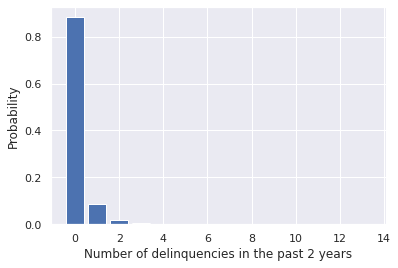

In [22]:
pmf_delinq = Pmf.from_seq(df['delinq_2yrs'], normalize = True)
pmf_delinq.bar()
plt.xlabel('Number of delinquencies in the past 2 years')
plt.ylabel('Probability')
plt.show()

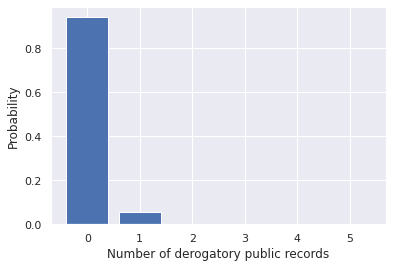

In [23]:
pmf_pubrec = Pmf.from_seq(df['pub_rec'], normalize = True)
pmf_pubrec.bar()
plt.xlabel('Number of derogatory public records')
plt.ylabel('Probability')
plt.show()

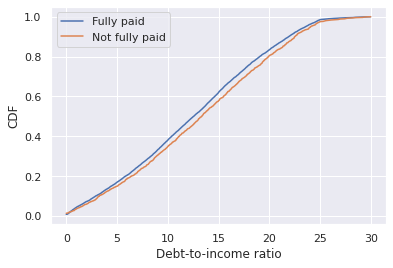

In [24]:
dti_0 = df[df['not_fully_paid'] == 0]['dti']
dti_1 = df[df['not_fully_paid'] == 1]['dti']  
cdf_dti_0 = Cdf.from_seq(dti_0, normalize = True)
cdf_dti_1 = Cdf.from_seq(dti_1, normalize = True)
cdf_dti_0.plot(label = "Fully paid")
cdf_dti_1.plot(label = "Not fully paid")
plt.legend()
plt.xlabel('Debt-to-income ratio')
plt.ylabel('CDF')
plt.show()

# **Preprocessing**

Next we'll go into the preprocessing aspect for the variables. First we'll import the necessary libraries. 

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [26]:
#Use dummy encoding for purpose
df_dummy = pd.get_dummies(df['purpose'], prefix = 'purpose', drop_first = True) #to avoid multicollinearity
#Merging dataframes to get the dummy variables
df = df.merge(df_dummy, left_index = True, right_index = True)

In [27]:
#Separate 'not_fully_paid' into the target for prediction
y = df['not_fully_paid']
#Drop the target and old categorical 'purpose' from dataframe
X = df
X.drop('purpose', axis='columns',inplace = True)
X.drop('not_fully_paid', axis = 'columns', inplace = True)

In [28]:
#Cont var will be standardized
cont_var = [c for c in df.columns if df[c].dtype == 'float']
cont_var.remove('log_annual_inc')
cont_var_exc_inc = cont_var

int_var = [c for c in df.columns if df[c].dtype == 'int']
int_var.remove('credit_policy')
int_var_exc_credit_policy = int_var

#Standardize the integer variables to improve accuracy except for log_annual_inc
standardizeX = StandardScaler()

# Initialize column transformer
columnTrans = ColumnTransformer(transformers = [
    ('cont',standardizeX,cont_var_exc_inc),
    ],remainder='passthrough')

# **Model Building**

First we'll use logistic regression to predict whether a person has fully paid yet or not. 

In [29]:
#Plugged in with tuned parameters from Optuna 200 trials
best_params = {'penalty': 'elasticnet',
 'tol': 1.8611902624672273e-05,
 'C': 55.166308273185024,
 'solver': 'saga',
 'max_iter': 6076,
 'multi_class': 'auto',
 'l1_ratio': 0.2500723485073292}
model1 = LogisticRegression(random_state = 0,**best_params)

#to hold results
accuracy = []
coef = np.zeros((1,19))
intercept = np.zeros((1,1))

#Establish stratified Kfold with 10 splits
skf = StratifiedKFold(n_splits = 10, shuffle = True)

for fold, (train_index,test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Standardize the continuous variables
    X_train = columnTrans.fit_transform(X_train)
    X_test = columnTrans.transform(X_test)

    #Fiting the model
    model1.fit(X_train, y_train)

    #Make prediction
    preds = model1.predict(X_test)

    #Scoring the model
    score = model1.score(X_test, y_test)
    accuracy.append(score)
    coef += model1.coef_
    intercept += model1.intercept_
    print(f'Accuracy score for {fold}th is: {score}')

print(f'The average score across all 10 folds is {np.mean(accuracy)}')

Accuracy score for 0th is: 0.8392484342379958
Accuracy score for 1th is: 0.8402922755741128
Accuracy score for 2th is: 0.8402922755741128
Accuracy score for 3th is: 0.8402922755741128
Accuracy score for 4th is: 0.8402922755741128
Accuracy score for 5th is: 0.8402922755741128
Accuracy score for 6th is: 0.8392484342379958
Accuracy score for 7th is: 0.8392484342379958
Accuracy score for 8th is: 0.8401253918495298
Accuracy score for 9th is: 0.8401253918495298
The average score across all 10 folds is 0.8399457464283611


We can see that this logistic regression model has an **average accuracy of 84%** across 10 folds in predicting who will be most likely to pay back the loan.

Then we'll analyze the relationship between X and y of each independent variables have on not_fully_paid

In [30]:
#Divide by the number of folds to get the average coefficients and intercept
coef = coef/10
intercept = intercept/10
coef = coef[0]
intercept = intercept[0]

In [31]:
import pprint #to print dictionary output nicely
pos_coef_list = []
neg_coef_list = []
pos_coef = {} #for positive coefficients var
neg_coef = {} #for negative coefficients var
for i,c in enumerate(X.columns): 
    if coef[i] > 0:
        pos_coef[c] = coef[i]
        pos_coef_list.append(coef[i])
    else:
        neg_coef[c] = coef[i]
        neg_coef_list.append(coef[i])
print('The default person with 0 across all variables has a probability of having not fully paid equals to:', intercept)
print('The bigger these variables below get, it means the more likely that the person has not fully paid')
pprint.pprint(pos_coef)
print("The bigger these variables below get, it means the more likely that the person has fully paid")
pprint.pprint(neg_coef)

The default person with 0 across all variables has a probability of having not fully paid equals to: [-3.20915944e-06]
The bigger these variables below get, it means the more likely that the person has not fully paid
{'credit_policy': 3.2285497722612332e-06,
 'delinq_2yrs': 2.0791661022427126e-06,
 'dti': 1.7772110564750868e-06,
 'fico': 5.210949637390454e-07,
 'inq_last_6mths': 3.1639314725732483e-06,
 'installment': 9.194146753355389e-07,
 'int_rate': 1.4096036764254213e-06,
 'purpose_small_business': 2.768830708217152e-07,
 'time_to_paid_off_mths': 5.406216222197649e-08}
The bigger these variables below get, it means the more likely that the person has fully paid
{'days_with_cr_line': -3.93211973536434e-06,
 'log_annual_inc': -2.817882271760152e-07,
 'pub_rec': -5.135161965479679e-07,
 'purpose_credit_card': -7.516472149644913e-07,
 'purpose_debt_consolidation': -1.5393519744107323e-06,
 'purpose_educational': -3.3952477660372596e-08,
 'purpose_home_improvement': -1.5659084069995884

# **Hyperparameter tuning**

This section below was only run a few times in order to get the optimized parameters for the logistic regression model.

In [32]:
#With Optuna for tuning
accuracy = []
def run(trial):
    penalty = trial.suggest_categorical('penalty',['l1', 'l2', 'elasticnet', 'none'])
    tol = trial.suggest_float('tol', 0.0000001, 0.0001, log = True)
    C = trial.suggest_float('C', 1.0, 100)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 10000)
    multi_class = trial.suggest_categorical('multi_class',["auto", "ovr", "multinomial"])
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1)

    #Standardize the continuous variables
    # Using regular train_test split to work with Optuna
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    X_train = columnTrans.fit_transform(X_train)
    X_test = columnTrans.transform(X_test)
    model1 = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, solver='lbfgs', 
                                max_iter=100, multi_class='auto', verbose=0, 
                            warm_start=False, n_jobs=-1, l1_ratio=None, random_state = 0)
    #Fiting the model
    model1.fit(X_train, y_train)

    #Make prediction
    preds = model1.predict(X_test)

    #Scoring the model
    score = model1.score(X_test, y_test)
    accuracy.append(score)
    print(f'Accuracy score is: {score}')
    return score

In [33]:
#Suppress optuna output
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction = 'maximize')
study.optimize(run, n_trials = 100)

Accuracy score is: 0.848643006263048
Accuracy score is: 0.8423799582463466
Accuracy score is: 0.8423799582463466
Accuracy score is: 0.8288100208768268
Accuracy score is: 0.8418580375782881
Accuracy score is: 0.8241127348643006
Accuracy score is: 0.8408141962421712
Accuracy score is: 0.8382045929018789
Accuracy score is: 0.8345511482254697
Accuracy score is: 0.8350730688935282
Accuracy score is: 0.8460334029227558
Accuracy score is: 0.8335073068893528
Accuracy score is: 0.8204592901878914
Accuracy score is: 0.8392484342379958
Accuracy score is: 0.8329853862212944
Accuracy score is: 0.843945720250522
Accuracy score is: 0.8475991649269311
Accuracy score is: 0.8408141962421712
Accuracy score is: 0.8423799582463466
Accuracy score is: 0.8413361169102297
Accuracy score is: 0.8418580375782881
Accuracy score is: 0.8324634655532359
Accuracy score is: 0.8475991649269311
Accuracy score is: 0.8444676409185804
Accuracy score is: 0.843945720250522
Accuracy score is: 0.8402922755741128
Accuracy score 

In [34]:
study.best_params

{'penalty': 'none',
 'tol': 8.738581492155619e-07,
 'C': 78.7865340189345,
 'solver': 'sag',
 'max_iter': 2503,
 'multi_class': 'ovr',
 'l1_ratio': 0.3027797431774766}